# Social dimensions of Eaton and Palisades fires
#### Week 8 - Discussion section

## 1. Metadata exploration
1. Review the CSV with the metadata information for the EJI data.

2. Look at the variables and with your team select a few variables that, in your opinion, could influence a community’s response to a wildfire. You’ll be working with some of them in the following exercises.


In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 
import xarray as xr
import matplotlib.patches as mpatches
import contextily as ctx

In [2]:
# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)

# Establish EJI file path 
eji_fp = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji = gpd.read_file(eji_fp)

In [3]:
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,Census Tract 51.27; San Joaquin County; Califo...,7580.0,1068.0,3339.0,1.5371,0.6422,1.5371,0.8546,1.8492,0.5249,70.6,0.7967,0.7967,0.7967,17.3653,0.2681,21.9,0.8673,6.4,0.6750,15.5,0.2331,23.4,0.4686,4.9,0.3598,7.8,0.3710,3.2429,0.4422,13.6,0.3482,28.7,0.8645,15.5,0.6721,6.7,0.8177,2.7025,0.9404,0.0,0.0000,0.2,0.4430,0.4430,0.2021,7.1851,0.5718,1.277,0.8778,4.104,0.9918,0.2628,0.6061,30.0,0.4976,2.9733,0.9343,64.5193,0.9859,86.8342,0.7837,100.0000,0.8446,0.000,0.0000,0.0,0.0,0.0,0.0,2.6142,0.9326,100.0000,0.5514,6.8,0.0690,8.5833,0.5168,1.1372,0.0961,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,1.000,0.8863,0,0.8863,0.8863,9.0358,0.9653,9.7,0.2505,0,4.6,0.1007,0,4.7,0.1148,0,15.9,0.3739,0,11.3,0.4116,0,0,0.0,14.2,0.6052,0.6052,0.6052,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.3182,0.9241,9,0.0,0.0,1,0.000,0.000,0,0.0408,0.0556,9,0.0,0.0,0,0.9797,0.1184,2.4746,0.3121,467.0,6.2,2800.0,36.9,1574.0,20.8,0.0,0.0,105.0,1.4,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,Census Tract 34.06; San Joaquin County; Califo...,3768.0,698.0,2198.0,2.5815,0.9857,1.7815,0.9546,3.0313,0.9703,90.9,0.9147,0.9147,0.9147,56.6348,0.9074,32.8,0.9536,11.4,0.9053,60.9,0.8374,47.8,0.9337,7.4,0.5368,13.4,0.6229,5.6971,0.9328,14.5,0.3966,32.4,0.9446,15.7,0.6828,14.3,0.9242,2.9482,0.9832,0.0,0.0000,0.3,0.5046,0.5046,0.2494,10.0646,0.9545,0.547,0.6949,3.831,0.9906,0.2316,0.5332,30.0,0.4976,2.7163,0.8823,0.0000,0.0000,4.1081,0.4003,99.9659,0.8422,0.000,0.0000,0.0,0.0,0.0,0.0,1.2425,0.5200,100.0000,0.5514,80.1,0.7802,13.5000,0.2064,1.5380,0.3928,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,0.817,0.6918,0,0.6918,0.6918,7.6134,0.8270,11.8,0.8079,1,5.5,0.1978,0,8.2,0.7153,1,20.3,0.8250,1,18.0,0.9195,1,4,0.8,15.0,0.6757,0.6757,0.6757,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.9545,0.9286,9,0.0,0.0,1,0.625,0.105,9,0.0408,0.0556,9,0.0,0.0,0,1.0892,0.1889,2.6546,0.4498,777.0,20.6,1539.0,40.8,907.0,24.1,0.0,0.0,0.0,0.0,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,

## 2. Polygon intersection

a. Open the fire perimeters and the EJI data and do initial data exploration.


In [4]:
## Import the fires

# Establish file path to read in eaton shapefile
eaton_fp =os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton = gpd.read_file(eaton_fp)

# Establish file path to read in palisades shapefile
palisades_fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades = gpd.read_file(palisades_fp)

In [5]:
eaton.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [6]:
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


In [7]:
print(f"The CRS of the Eaton Fires shapefile is {eaton.crs.name} ({eaton.crs}).")

The CRS of the Eaton Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


In [8]:
print(f"The CRS of the Palisades Fires shapefile is {palisades.crs.name} ({palisades.crs}).")

The CRS of the Palisades Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


Text(0.5, 1.0, 'Eaton Fire')

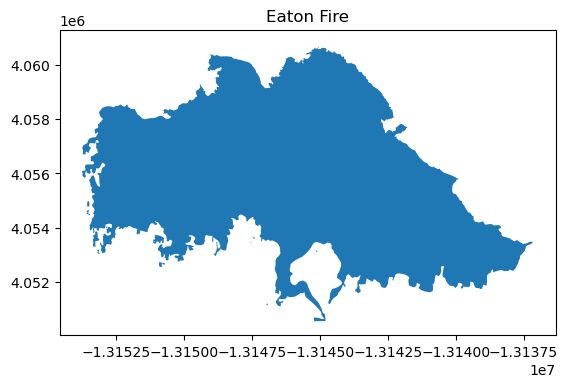

In [9]:
fig, ax = plt.subplots()
eaton.plot(ax=ax)
ax.set_title("Eaton Fire")

Text(0.5, 1.0, 'Palisades Fire')

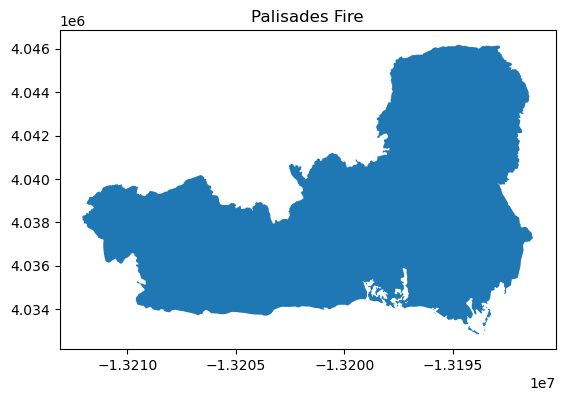

In [10]:
fig, ax = plt.subplots()
palisades.plot(ax=ax)
ax.set_title("Palisades Fire")

In [11]:
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,Census Tract 51.27; San Joaquin County; Califo...,7580.0,1068.0,3339.0,1.5371,0.6422,1.5371,0.8546,1.8492,0.5249,70.6,0.7967,0.7967,0.7967,17.3653,0.2681,21.9,0.8673,6.4,0.6750,15.5,0.2331,23.4,0.4686,4.9,0.3598,7.8,0.3710,3.2429,0.4422,13.6,0.3482,28.7,0.8645,15.5,0.6721,6.7,0.8177,2.7025,0.9404,0.0,0.0000,0.2,0.4430,0.4430,0.2021,7.1851,0.5718,1.277,0.8778,4.104,0.9918,0.2628,0.6061,30.0,0.4976,2.9733,0.9343,64.5193,0.9859,86.8342,0.7837,100.0000,0.8446,0.000,0.0000,0.0,0.0,0.0,0.0,2.6142,0.9326,100.0000,0.5514,6.8,0.0690,8.5833,0.5168,1.1372,0.0961,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,1.000,0.8863,0,0.8863,0.8863,9.0358,0.9653,9.7,0.2505,0,4.6,0.1007,0,4.7,0.1148,0,15.9,0.3739,0,11.3,0.4116,0,0,0.0,14.2,0.6052,0.6052,0.6052,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.3182,0.9241,9,0.0,0.0,1,0.000,0.000,0,0.0408,0.0556,9,0.0,0.0,0,0.9797,0.1184,2.4746,0.3121,467.0,6.2,2800.0,36.9,1574.0,20.8,0.0,0.0,105.0,1.4,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,Census Tract 34.06; San Joaquin County; Califo...,3768.0,698.0,2198.0,2.5815,0.9857,1.7815,0.9546,3.0313,0.9703,90.9,0.9147,0.9147,0.9147,56.6348,0.9074,32.8,0.9536,11.4,0.9053,60.9,0.8374,47.8,0.9337,7.4,0.5368,13.4,0.6229,5.6971,0.9328,14.5,0.3966,32.4,0.9446,15.7,0.6828,14.3,0.9242,2.9482,0.9832,0.0,0.0000,0.3,0.5046,0.5046,0.2494,10.0646,0.9545,0.547,0.6949,3.831,0.9906,0.2316,0.5332,30.0,0.4976,2.7163,0.8823,0.0000,0.0000,4.1081,0.4003,99.9659,0.8422,0.000,0.0000,0.0,0.0,0.0,0.0,1.2425,0.5200,100.0000,0.5514,80.1,0.7802,13.5000,0.2064,1.5380,0.3928,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,0.817,0.6918,0,0.6918,0.6918,7.6134,0.8270,11.8,0.8079,1,5.5,0.1978,0,8.2,0.7153,1,20.3,0.8250,1,18.0,0.9195,1,4,0.8,15.0,0.6757,0.6757,0.6757,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.9545,0.9286,9,0.0,0.0,1,0.625,0.105,9,0.0408,0.0556,9,0.0,0.0,0,1.0892,0.1889,2.6546,0.4498,777.0,20.6,1539.0,40.8,907.0,24.1,0.0,0.0,0.0,0.0,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,

In [12]:
eji.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9109 entries, 0 to 9108
Columns: 174 entries, OBJECTID to geometry
dtypes: float64(147), geometry(1), int64(15), object(11)
memory usage: 12.1+ MB


Text(0.5, 1.0, 'Census Tracts')

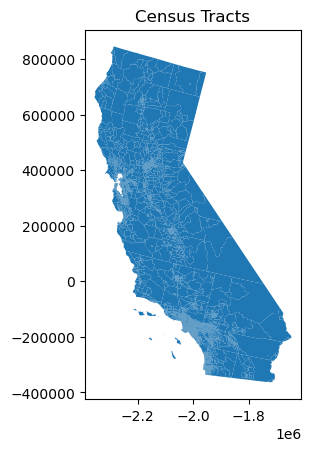

In [13]:
fig, ax = plt.subplots()
eji.plot(ax=ax)
ax.set_title("Census Tracts")

b. Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

In [14]:
# CRS do not match, reproject to match
crs_reference = palisades.crs
eji = eji.to_crs(crs_reference)

eji_palisades = gpd.sjoin(eji, palisades, predicate = "intersects")

c. Create an exploratory map showing
- the census tracts that intersect the Palisades fire perimeter and
- the Palisades fire perimeter.
- **Discuss how big is the Palisades fire perimeter in relation to the census tracts.**

In [15]:
eji_palisades.head()

,OBJECTID_left,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,OBJECTID_right,type,Shape__Are,Shape__Len
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,Census Tract 2627.06; Los Angeles County; Cali...,3492.0,466.0,4576.0,0.848,0.238,0.648,0.2408,1.7993,0.496,11.7,0.195,0.195,0.195,9.5074,0.0978,1.2,0.0508,3.7,0.3899,24.0,0.4047,16.5,0.2195,0.3,0.0128,0.9,0.0341,1.2096,0.058,22.6,0.7955,30.0,0.8994,7.2,0.1311,1.8,0.5723,2.3983,0.81,0.0,0.0,0.2,0.443,0.443,0.2021,4.2459,0.1178,0.729,0.7465,0.82,0.8789,0.2259,0.518,30.0,0.4976,2.641,0.8676,0.0,0.0,0.0,0.0,100.0,0.8446,0.0,0.0,0.0,0.0,0.0,0.0,0.8446,0.3699,100.0,0.5514,67.1,0.6303,14.5833,0.1225,1.3042,0.1892,0.0,0.0,100.0,0.6136,0.0,0.0,0.6136,0.2271,0.675,0.6175,0,0.6175,0.6175,6.0209,0.5302,9.1,0.1242,0,11.4,0.9251,1,5.7,0.267,0,12.8,0.087,0,8.9,0.1378,0,1,0.2,18.8,0.9236,0.9236,0.9236,0.0,0.0,7.8,0.4978,0.4978,0.4939,3.175,0.5906,9,75.4091,0.9653,9,0.0,0.0,1,4.4167,0.8605,9,0.1915,0.1237,9,0.0,0.0,0,2.5401,0.8179,3.9615,0.9513,0.0,0.0,112.0,3.2,224.0,6.4,0.0,0.0,0.0,0.0,72.0,2.1,0.0,0.0,0.0,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.084 4033844.651, -13...",0,1,Heat Perimeter,1182.082031,267.101144
1328,6505,06,037,262706,140000US06037262706,06037262706,06037262706,Los Angeles County,California,CA,Census Tract 2627.06; Los Angeles County; Cali...,3492.0,466.0,4576.0,0.848,0.238,0.648,0.2408,1.7993,0.496,11.7,0.195,0.195,0.195,9.5074,0.0978,1.2,0.0508,3.7,0.3899,24.0,0.4047,16.5,0.2195,0.3,0.0128,0.9,0.0341,1.2096,0.058,22.6,0.7955,30.0,0.8994,7.2,0.1311,1.8,0.5723,2.3983,0.81,0.0,0.0,0.2,0.443,0.443,0.2021,4.2459,0.1178,0.729,0.7465,0.82,0.8789,0.2259,0.518,30.0,0.4976,2.641,0.8676,0.0,0.0,0.0,0.0,100.0,0.8446,0.0,0.0,0.0,0.0,0.0,0.0,0.8446,0.3699,100.0,0.5514,67.1,0.6303,14.5833,0.1225,1.3042,0.1892,0.0,0.0,100.0,0.6136,0.0,0.0,0.6136,0.2271,0.675,0.6175,0,0.6175,0.6175,6.0209,0.5302,9.1,0.1242,0,11.4,0.9251,1,5.7,0.267,0,12.8,0.087,0,8.9,0.1378,0,1,0.2,18.8,0.9236,0.9236,0.9236,0.0,0.0,7.8,0.4978,0.4978,0.4939,3.175,0.5906,9,75.4091,0.9653,9,0.0,0.0,1,4.4167,0.8605,9,0.1915,0.1237,9,0.0,0.0,0,2.5401,0.8179,3.9615,0.9513,0.0,0.0,112.0,3.2,224.0,6.4,0.0,0.0,0.0,0.0,72.0,2.1,0.0,0.0,0.0,-999,-999,6486.563559,2.147847e+06,"MULTIPOLYGON (((-13195148.084 4033844.651, -13...",1,2,Heat Perimeter,2222.488281,185.498783
1328,6505,06,037,262706,140000US06037262706,06037

<function matplotlib.pyplot.show(close=None, block=None)>

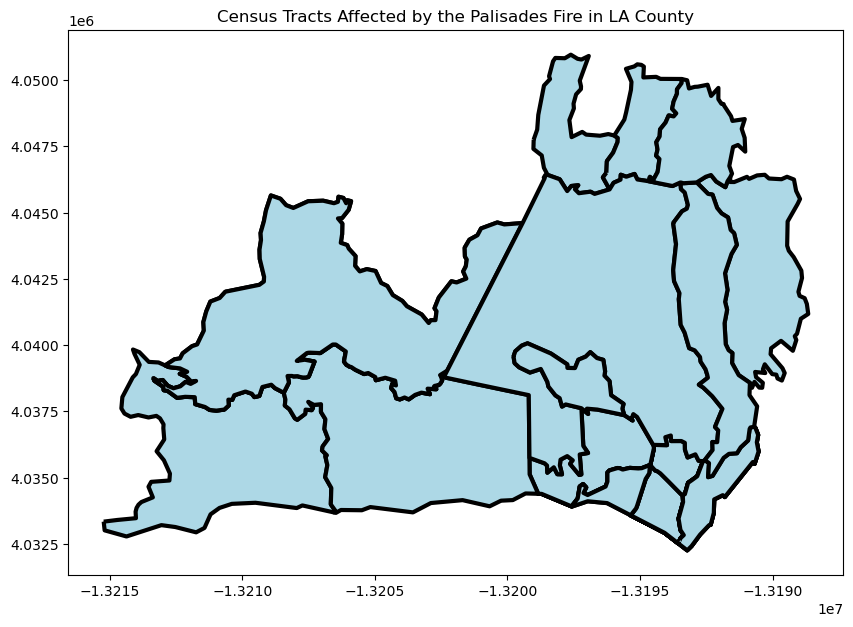

In [16]:
fig, ax = plt.subplots(figsize = (10,8))

eji_palisades.plot(ax= ax, edgecolor = "black",  facecolor = "lightblue", linewidth = 3)

ax.set_title("Census Tracts Affected by the Palisades Fire in LA County")

#ax.legend(handles = eji_palisades[""])
#ax.set_axis_off()
plt.show

d. Create the corresponding geopandas.GeoDataFrame and exploratory map for the Eaton fire.
- **Discuss how big is the Eaton fire perimeter in relation to the census tracts intersectig the Eaton fire perimeter.**

In [17]:
# CRS do not match, reproject to match
crs_reference = eaton.crs
eji = eji.to_crs(crs_reference)

eji_eaton = gpd.sjoin(eji, eaton, predicate = "intersects")

<function matplotlib.pyplot.show(close=None, block=None)>

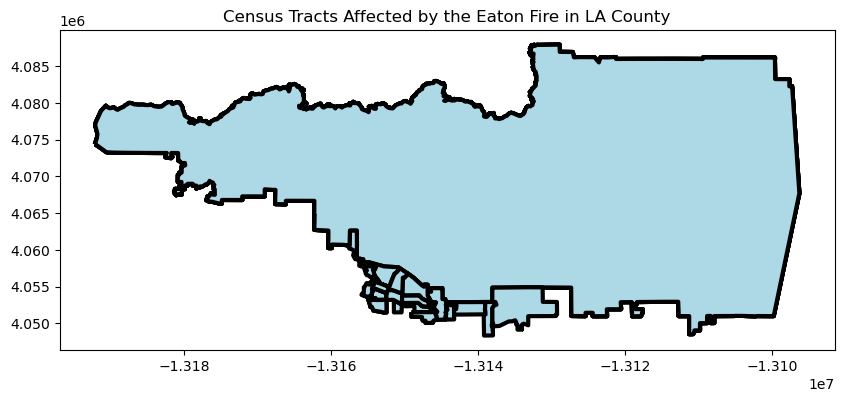

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

eji_eaton.plot(ax= ax, edgecolor = "black", facecolor = "lightblue",linewidth = 3)

ax.set_title("Census Tracts Affected by the Eaton Fire in LA County")

#ax.legend(handles = eji_palisades[""])
#ax.set_axis_off()
plt.show

## 3. Polygon clipping

a. Clip the census tracts to the Palisades fire perimeter using geopandas.clip().

In [19]:
crs_reference = palisades.crs
eji = eji.to_crs(crs_reference)
eji.crs == palisades.crs

True

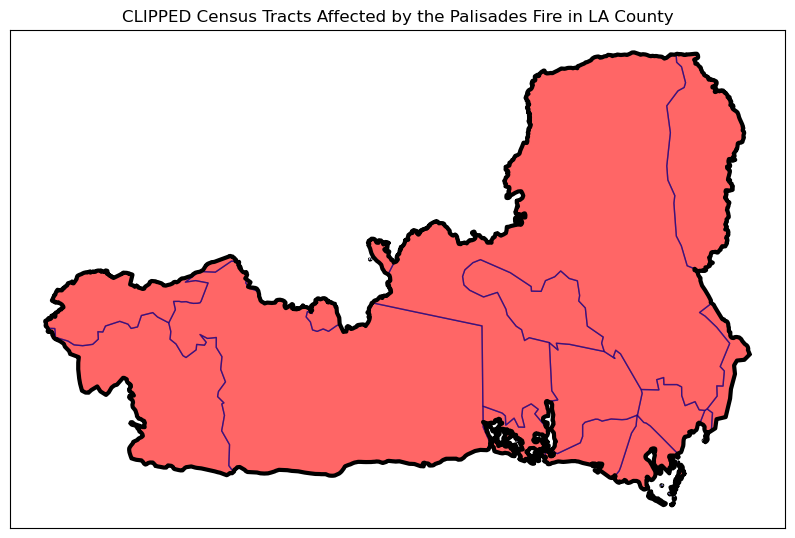

In [20]:
#?gpd.clip
eji_palisades_clip = gpd.clip(eji, palisades)

fig, ax = plt.subplots(figsize = (10,8))

eji_palisades_clip.plot(ax = ax, facecolor = "red", edgecolor = "darkblue", linewidth = 1, alpha = .6)

palisades.plot(ax = ax, color = "none", edgecolor = "black", linewidth = 3)

ax.set_title("CLIPPED Census Tracts Affected by the Palisades Fire in LA County")

ax.set_xticks([])
ax.set_yticks([])

#ax.legend(handles = eji_palisades[""])
#ax.set_axis_off()
plt.show()

b. Do the same for the Eaton fire perimeter.


<function matplotlib.pyplot.show(close=None, block=None)>

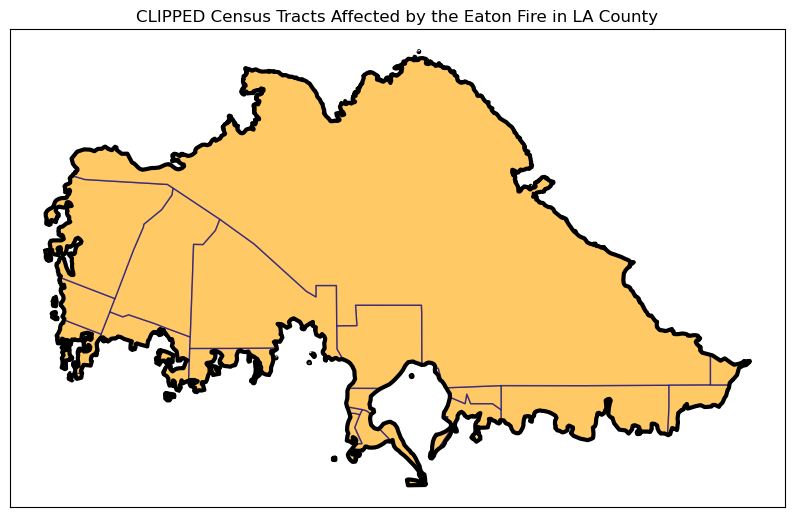

In [21]:
#?gpd.clip
eji_eaton_clip = gpd.clip(eji, eaton)

fig, ax = plt.subplots(figsize = (10,8))

eji_eaton_clip.plot(ax = ax, facecolor = "orange", edgecolor = "darkblue", linewidth = 1, alpha = .6)
eaton.plot(ax = ax, color = "none", edgecolor = "black", linewidth = 3)

ax.set_title("CLIPPED Census Tracts Affected by the Eaton Fire in LA County")

ax.set_xticks([])
ax.set_yticks([])

#ax.set_axis_off()
plt.show

c. Quickly visualize your data.

**Discuss with your group the difference between a spatial join (step 2) and clipping (step 3). Make sure you understand the difference and what your goal is when transforming geospatial data!**


Spatial JOIN will RETURN the attributes shared by either or and/or both geopandas objects (ATTRIBUTE MERGING BASED ON SPATIAL SPECIFICATION). A spatial clip simply isolates the original geopandas object of interest SPATIALLY to its mask (CLIP GEOMETRIES BASED ON MASK). Attributes of only the input object are returned for a clip compared to the attributes joined by a spatial join.

## 4. Visualize fire perimeters with a basemap
To add a basemap to our plot we will be using the contextily library.

a. Import the contextily library at the top of your notebook as ctx. This library is already installed in the EDS 220 environment.

b. Use and update the code below to plot the fire perimeters adding a basemap:



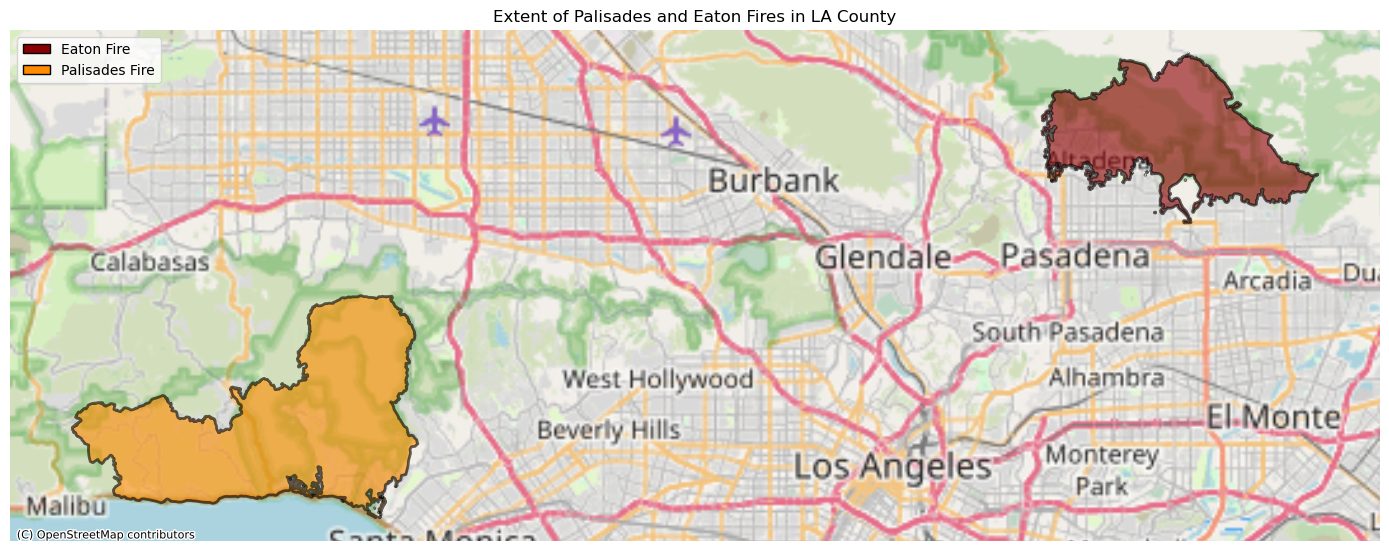

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))


# Manually add patches for legend reference
palisades_patch = mpatches.Patch(facecolor = "darkorange", edgecolor = "black", label = "Palisades Fire")
eaton_patch = mpatches.Patch(facecolor = "darkred", edgecolor = "black", label = "Eaton Fire")


# Plot each fire perimeter
palisades.plot(ax = ax, facecolor = "darkorange", edgecolor = "black", label = "Palisades Fire", alpha = .6, linewidth= 2)
eaton.plot(ax = ax, facecolor = "darkred", edgecolor = "black", label = "Eaton Fire", alpha = .6, linewidth = 2)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE
ax.legend(handles = [eaton_patch, palisades_patch], loc = "upper left")

# ADD TITLE
ax.set_title("Extent of Palisades and Eaton Fires in LA County")
ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Visualize EJI data
a. Use and update the code below to plot one of the variables you and your team explored in step 1 as being relevant to a community’s response to a wildfire.


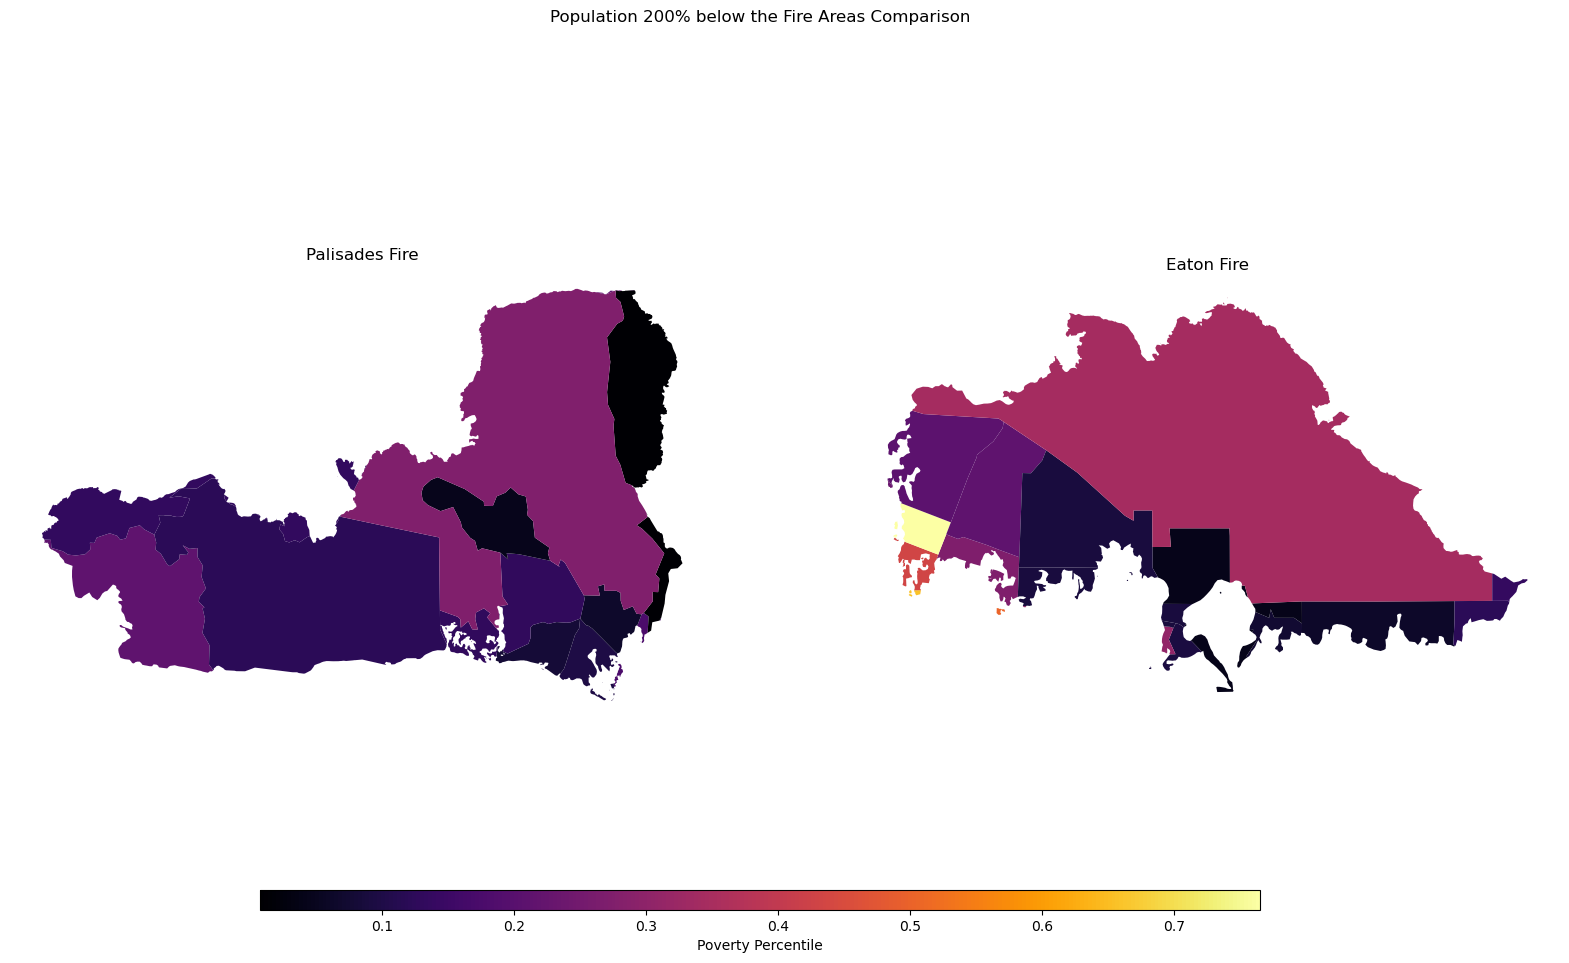

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'EPL_POV200'

# Find common min/max for legend range
vmin = min(eji_palisades_clip[eji_variable].min(), eji_eaton_clip[eji_variable].min())
vmax = max(eji_palisades_clip[eji_variable].max(), eji_eaton_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_palisades_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    cmap = "inferno"
)

ax1.set_title('Palisades Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    cmap = "inferno"
)
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Population 200% below the Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap="inferno")
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', cmap = "inferno")
cbar.set_label('Poverty Percentile')

plt.show()

With your team, write a short paragraph discussing how or whether this variable is distributed differently across the two fire perimeters. What kind of implications could this have in terms of wildifre relief?



There is a higher percentage of higher income communities increasingly affected by the Palisades Fire compared to lower income communities. The most significant 